# Classification
In the last lectures, you have learned and applied some regression models. In this lecture, you will be learning what is classification and how to solve a classification project.

# Setup
First, let's make sure this notebook works well in both python 2 and 3. 
## Import a few common modules

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os


In [3]:
# to make this notebook's output stable across runs
np.random.seed(42)

## Ensure MatplotLib plots figures inline 


In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import os

# some parameters cofiguration for figures
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Prepare a function to save the figures

In [5]:
# Where to save the figures
PROJECT_ROOT_DIR = "." # . means save the figures folder in the same folder we are working from

# define a function that saves figures
def save_fig(fig_id, tight_layout=True):
    # The path of the figures folder ./Figures/fig_id.png (fig_id is a variable that you specify 
    # when you call the function)
    path = os.path.join(PROJECT_ROOT_DIR, "Figures", fig_id + ".png") 
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [30]:
# Define a function that saves figures
def save_fig(fig_id, tight_layout=True):
    # Create the Figures directory if it doesn't exist
    figures_path = os.path.join(PROJECT_ROOT_DIR, "Figures")
    if not os.path.exists(figures_path):
        os.makedirs(figures_path)

    # The path of the figures folder ./Figures/fig_id.png (fig_id is a variable that you specify
    # when you call the function)
    path = os.path.join(figures_path, fig_id + ".png")
    print("Saving figure", fig_id)

    # Adjust layout for better view if tight_layout is True
    if tight_layout:
        plt.tight_layout()

    # Save the figure in the specified path
    plt.savefig(path, format="png", dpi=300)

#  The “Hello World” of Machine Learning: MNIST dataset
<a href="https://www.openml.org/d/554">MNIST dataset</a>, is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. 

Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.


## Load the MNIST dataset
- Import `fetch_openml` from `sklearn.datasets`
- use `fetch_openml(name='mnist_784', version='1', data_id=None, data_home=None, target_column='default-target', cache=True, return_X_y=False, as_frame=False)`
- put the result in `mnist` variable

In [8]:
import jupyter_black
jupyter_black.load()

In [9]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml(
    name="mnist_784",
    version="1",
    data_id=None,
    data_home=None,
    target_column="default-target",
    cache=True,
    return_X_y=False,
    as_frame=False,
)
display(mnist)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [10]:
type(mnist)

sklearn.utils._bunch.Bunch

In [11]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [12]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

## Put the features in a variable `X` and the labels in a variable `y`
You access the features from the `data` array and the labels from the `target` array saved in `mnist` variable.

In [13]:
X = mnist["data"]
y = mnist["target"]

In [14]:
X.shape

(70000, 784)

In [15]:
y.shape

(70000,)

There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels, and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black). 

In [ ]:
28*28

## Visualize an instance from the dataset
Each row in the dataset represents one digit of length 784 which correponds to the pixel intensities of the image of this digit.
Let’s take a peek at one digit from the dataset. All you need to do is grab an instance’s feature vector, reshape it to a 28×28 array, and display it using Matplotlib’s `imshow()` function.

### import matplotlib and pyplot

In [16]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Save the sample 36000 in the variable `some_digit`

In [20]:
some_digit = X[36000]

### Reshape the feature vector in `some_digit` to 28x28
- Use `reshape()`.
- Put the result in the variable `some_digit_image`

In [21]:
some_digit_image = some_digit.reshape(28, 28)

### Plot the resulting image using `imshow()` 
Use `cmap = matplotlib.cm.binary` in `imshow()` to draw a binary image. Try to remove it and see what you get.

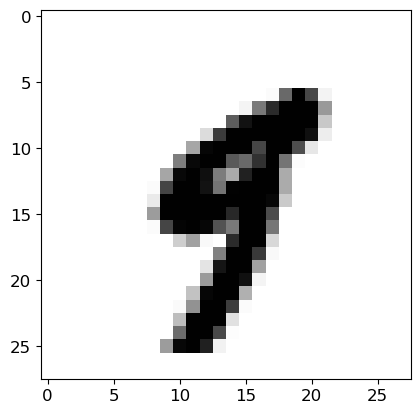

In [22]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)

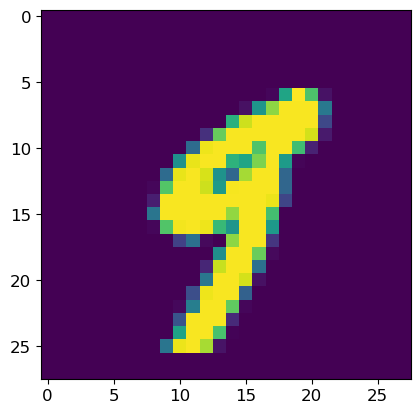

In [23]:
plt.imshow(some_digit_image)

This looks like a 9, and indeed that’s what the label tells us:

In [24]:
y[36000]

'9'

### Write a function that takes as input a data vector, reshapes it and plots the resulting image

In [25]:
def plot_digit(data):
    plt.imshow(data.reshape(28, 28), cmap=matplotlib.cm.binary)

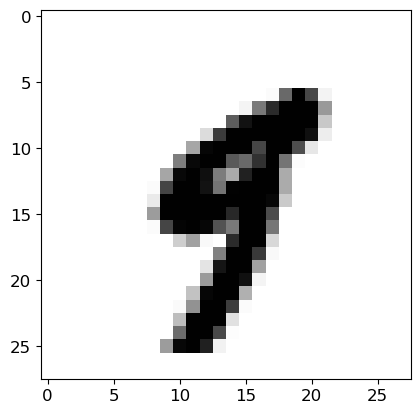

In [26]:
plot_digit(some_digit)

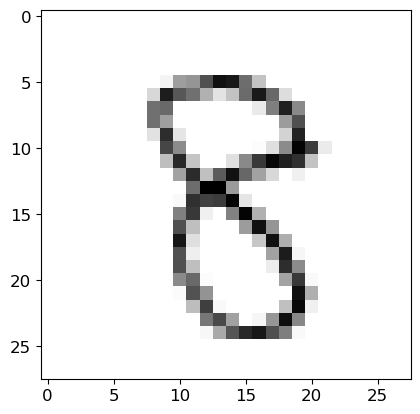

In [27]:
plot_digit(X[3600])

### Plot  several images from the dataset next to each other
The following is a function to plot several images from the dataset next to each other. It is just to show you the complexity of the classification task.

In [28]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size, size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap=matplotlib.cm.binary, **options)
    plt.axis("off")

Call the above function on a selection of data 

Saving figure more_digits_plot


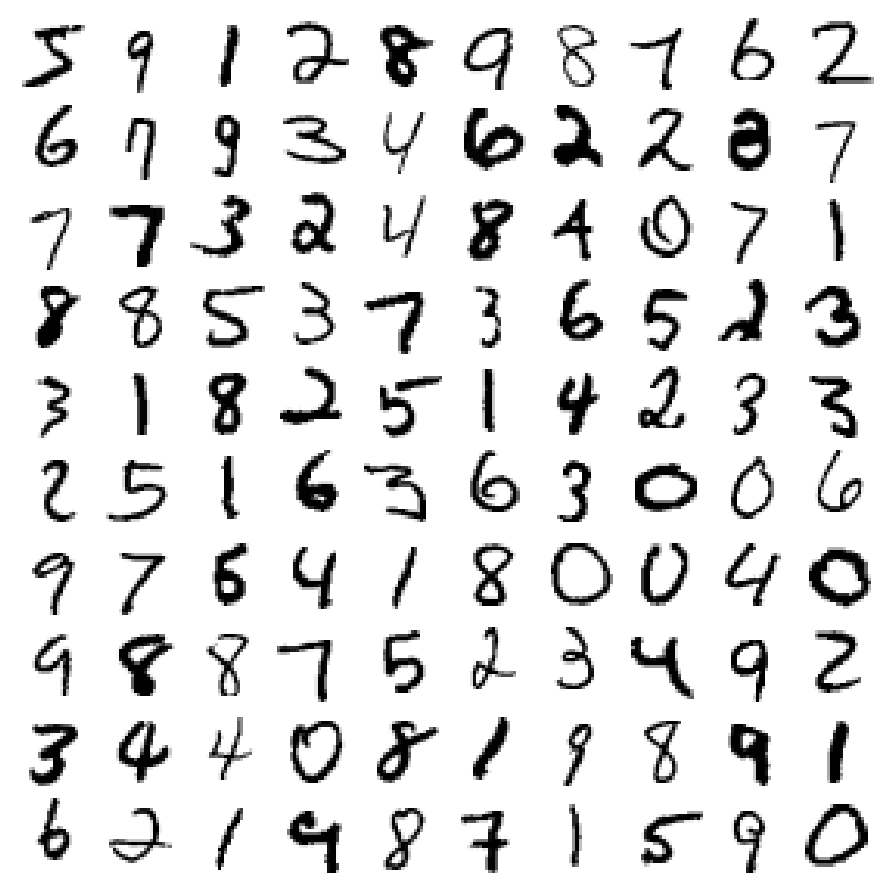

In [31]:
plt.figure(figsize=(9, 9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

# Create the Training and Testing datasets 
## Fixed split
Split the data in a training set of the first 60,000 examples, and a test set of 10,000 examples.
Put the results in `X_train: training features, X_test: testing features, y_train: training labels, y_test: testing labels`.

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)  # shuffle

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

In [47]:
import pandas as pd

pd.DataFrame(y).value_counts() / len(y)

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
dtype: float64

In [48]:
pd.DataFrame(y).value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
dtype: int64

In [49]:
pd.DataFrame(y_test).value_counts() / len(y_test)

1    0.114286
7    0.107357
3    0.102357
9    0.101429
6    0.099714
2    0.098571
8    0.096929
0    0.095929
4    0.092500
5    0.090929
dtype: float64

In [50]:
pd.DataFrame(y_test).value_counts()

1    1600
7    1503
3    1433
9    1420
6    1396
2    1380
8    1357
0    1343
4    1295
5    1273
dtype: int64

## Shuffling

Some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row. Shuffling the dataset ensures that this won’t happen.

**Data Shuffling**
Have you played the game of cards ? At the end of each round of play, all the cards are collected, shuffled & followed by a cut to ensure that cards are distributed randomly & stack of cards each player gets is only due to chance.

In machine learning(ML) , we are often presented with a dataset that will be further split into training, testing & validation datasets. It is very important that dataset is shuffled well to avoid any element of bias/patterns in the split datasets before training the ML model.

- Key Benefits of Data Shuffling

 - Improve the ML model quality
 - Improve the predictive performance

![DataShuffling](img/DataShuffling.PNG)

Another way is to create variable of random indices and just pick these indices from the dataset.

In [51]:
X_train = X[:60000]
X_test = X[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [52]:
import numpy as np

shuffle_index = np.random.permutation(X_train.shape[0])
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [53]:
X_train.shape

(60000, 784)

In [54]:
pd.DataFrame(y_train).value_counts() / len(y_train)

1    0.112367
7    0.104417
3    0.102183
2    0.099300
9    0.099150
0    0.098717
6    0.098633
8    0.097517
4    0.097367
5    0.090350
dtype: float64

In [55]:
pd.DataFrame(y_train).value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

## Percentage split using random selection
- Import `train_test_split` from `sklearn.model_selection`
- Use `train_test_split(Features array,labels vector, test_size=split ratio, random_state=42)`
- Set the ratio to 0.2

In [56]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56000, 784), (14000, 784), (56000,), (14000,))

# Binary classifier
We call a binary classifier, a classifier (model) which aims at classifying between two categories (we call them classes too).

Let’s simplify the problem for now and only try to identify one digit — for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. 



## Create target variables `y_train_5` and `y_test_5` with values True for all 5s and False for all other digits.
From the train and test sets, get only the ones equal to 5. 
The target variables are **binary (True or False/ 0 or 1)**.
- Hint: use `==`

In [58]:
y_train_5 = y_train == "5"

In [59]:
y_train_5

array([ True, False, False, ..., False, False, False])

In [60]:
sum(y_train_5)

5040

In [61]:
y_test_5 = y_test == "5"

In [62]:
sum(y_test_5)

1273

## Stochastic Gradient Descent (SGD) classifier
Okay, now let’s pick a classifier and train it. A good place to start is with a **Stochastic Gradient Descent (SGD) classifier**, using Scikit-Learn’s `SGDClassifier` class. 

This classifier has the advantage of being capable of handling very large datasets efficiently. This is in part because SGD deals with training instances independently, one at a time.

### Create an `SGDClassifier` and train it on the whole training set:

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html">Here is the documentation</a> of SGDClassifier.
- Put the model in a variable named `sgd_clf`
- Set the maximum iterations to 5
- The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the `random_state` parameter.
- Use `sgd_clf.fit(X_train, y_train_5)` to train the model


In [64]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)

In [65]:
sgd_clf.fit(X_train, y_train_5)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

### Use the model to detect images of the number 5. 
Use `.predict()`.

In [66]:
sgd_pred_5 = sgd_clf.predict(X_test)

### What does the classifier predict?

In [68]:
y_test[sgd_pred_5]

array(['8', '5', '0', ..., '5', '3', '5'], dtype=object)

### Apply the classifier on the whole training set.

In [69]:
sgd_clf.fit(X_train, y_train)

/Users/fulin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5, random_state=42)

## Peformance measure: Accuracy
Now, let’s evaluate this model’s performance.

Accuracy is one performance measure for evaluating classification models. It is the percentage of predictions the model got right.

$
\text{Accuracy} = \cfrac{Number of good predictions}{Total predictions}
$

### Compute the accuracy.

In [70]:
sdg_pred = sgd_clf.predict(X_test)

In [72]:
accuracy = (y_test == sdg_pred).mean()

In [73]:
accuracy

0.8106428571428571

## KNN classifier
Lets try the knn classifier.
### Create an KNN classifier and train it on the whole training set: 
- Import `KNeighborsClassifier` from `sklearn.neighbors`
- <a href="http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html">Here is the documentation</a> of KNeighborsClassifier.
- Set the number of jobs to `-1`
- Set the weights to `distance`
- Set the number of neighbors to 4

In [ ]:
## Your code here ##

### Apply the KNN classification model on the test set.

In [ ]:
## Your code here ##

### Compute the classification accuracy on the test set.
- Import `accuracy_score` from `sklearn.metrics`
- Use `accuracy_score(testing labels, testing predictions)`

In [ ]:
## Your code here ##

## Random Forest Classifier 
Let’s train a RandomForestClassifier and compare its accuracy to the other classifiers.
### Train a Random Forest Classifier on the training set
- <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">Here is the documentation</a> of RandomForestClassifier.
- Import `RandomForestClassifier` from `sklearn.ensemble` 

In [ ]:
# YOUR CODE HERE

### Apply the KNN classification model on the test set to get the predictions

In [ ]:
# YOUR CODE HERE

### Compute the accuracy

In [ ]:
# YOUR CODE HERE

### Which is the best classifier?

In [ ]:
# YOUR CODE HERE

 # <span style=color:blue> Multiclass Classification</span>

### <span style=color:blue> Instructions: </span> 

**<span style=color:blue> 1.  Fill in the blanks with the appropriate codes** </span> </br>
**<span style=color:blue> 2.  Comment on what each group of codes does as precisely as possible** </span>


Multiclass classifiers : distinguish between more than two classes.

Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly. Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers. 

However, there are various strategies that you can use to perform multiclass classification using multiple binary classifiers.

![one-vs-all-classification](img/one-vs-all-classification.png)

For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

## One-versus-One (OvO) strategy
Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. 

If there are N classes, you need to train N × (N – 1) / 2 classifiers. For the MNIST problem, this means training 45 binary classifiers! When you want to classify an image, you have to run the image through all 45 classifiers and see which class wins the most duels. The main advantage of OvO is that each classifier only needs to be trained on the part of the training set for the two classes that it must distinguish.

Some algorithms (such as Support Vector Machine classifiers) scale poorly with the size of the training set, so for these algorithms OvO is preferred since it is faster to train many classifiers on small training sets than training few classifiers on large training sets. For most binary classification algorithms, however, OvA is preferred.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for which it uses OvO). 

## Train the SGDClassifier on Xtrain. Use y_train labels.

In [ ]:
# YOUR CODE HERE

### Predict some_digit label

In [ ]:
# Remember : some_digit was defined earlier
# YOUR CODE HERE

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.
To see that this is indeed the case, you can call the `decision_function()` method. Instead of returning just one score per instance, it now returns 10 scores, one per class.

### Try the `decision_function()` on some_digit

In [ ]:
# YOUR CODE HERE

### Use `np.argmax` to find which class the highest score corresponds to.

In [ ]:
# YOUR CODE HERE

### Find out all the classes labels using `.classes_`

In [ ]:
# YOUR CODE HERE

## One Vs One Strategy
To force ScikitLearn to use one-versus-one or one-versus-all, you can use the `OneVsOneClassifier` or `OneVsRestClassifier` classes. 
### Train the a multiclass SGDClassifier using the one vs one strategy
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html">Here is the documentation</a> of OneVsOneClassifier.
- Import `OneVsOneClassifier` from `sklearn.multiclass`
- Use OneVsOneClassifier(classifier)

In [ ]:
# YOUR CODE HERE

### Apply the classifier on some_digit

In [ ]:
# Remember : some_digit was defined earlier
# YOUR CODE HERE

### Check the number of trained classifiers.
- Use model.estimators_

In [ ]:
# YOUR CODE HERE

## Train a Random Forest classifier
Random Forest classifiers can directly classify instances into multiple classes.



In [ ]:
# YOUR CODE HERE

### Test it on some_digit

In [ ]:
# YOUR CODE HERE

### Check the probabilities of prediction corresponding to every class


In [ ]:
forest_clf.predict_proba([some_digit])

# Multilabel classification


![multi_label_classification](img/multi_label_classification.jpg)

Mutliple classes for one instance.

Face-recognition classifier: what should it do if it recognizes several people on the same picture? Of course it should attach one label per person it recognizes. Say the classifier has been trained to recognize three faces, Alice, Bob, and Charlie; then when it is shown a picture of Alice and Charlie, it should output [1, 0, 1] (meaning “Alice yes, Bob no, Charlie yes”). Such a classification system that outputs multiple binary labels is called a multilabel classification system.

Lets create a multi-label classifier.

## Create a y_multilabel array containing two target labels for each digit image:

- First label: whether or not the digit is large (7, 8, or 9)
- Second label: whether or not it is odd.

In [ ]:
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(np.int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

## Train a KNeighbors classifier (supports multilabel classification):

In [ ]:
# YOUR CODE HERE

## Predict the result on `some_digit`

In [ ]:
# YOUR CODE HERE

# Multioutput classification
 A generalization of multilabel classification where each label can be multiclass.
 
 To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image, represented as an array of pixel intensities, just like the MNIST images. Notice that the classifier’s output is multilabel (one label per pixel) and each label can have multiple values (pixel intensity ranges from 0 to 255). It is thus an example of a multioutput classification system.
 

## Create the noise (random values) and add it  to the training and testing images.

In [ ]:
noise = np.random.randint(0, 100, (len(X_train), 784))
noise


In [ ]:
X_train_mod = X_train + noise

In [ ]:
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

YOUR ANSWER HERE

In [ ]:
# YOUR CODE HERE

In [ ]:
y_test_mod

## Plot one of the images to see the effect of the noise:

In [ ]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
save_fig("noisy_digit_example_plot")
plt.show()

## Train a k-nearest neighbors classifier and test it on a sample of your choice

In [ ]:
# YOUR CODE HERE

## Plot the resulting prediction

In [ ]:
# YOUR CODE HERE